In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_excel("C:/Users/knowl/OneDrive/Desktop/ProjectRegression.xlsx")

In [7]:
df.head(10)

,Dates,House Rate Dallas,House Rate Houston,House Rate San Antonio,House Rate Austin,House Rate El Paso,House Rate Lubbock,House Rate Waco,House Rate Laredo,Schools San Antonio,...,Jobs Waco,Jobs Laredo,Average of business Waco,Average of business Laredo,Average of Businesses Lubbock,Average of business El Paso,Average of business Houston,Average of business San Antonio,Average of business Dallas,Average of business search Austin
0,2020-04-30,-0.000036,-0.000007,0.001338,0.003904,0.004798,0.004050,0.004331,0.004620,27.00,...,0.0,0.0,0.0,0,0,0.0,51.00,42.00,48.50,45.50
1,2020-05-31,-0.000822,-0.000185,0.001351,0.002384,0.004469,0.004444,0.003688,0.006128,29.60,...,0.0,0.0,0.0,0,0,0.0,44.60,24.60,46.60,45.40
2,2020-06-30,0.001373,0.001763,0.003602,0.004029,0.004838,0.006405,0.006680,0.007922,28.25,...,0.0,0.0,13.0,0,0,0.0,55.50,36.25,56.25,45.25
3,2020-07-31,0.005424,0.005133,0.006151,0.008463,0.007229,0.007726,0.010399,0.010287,38.50,...,0.0,0.0,0.0,0,0,0.0,54.00,30.50,57.25,42.50
4,2020-08-31,0.009367,0.007760,0.009597,0.013615,0.010536,0.008612,0.014015,0.009523,33.20,...,5.4,0.0,0.0,0,0,0.0,49.60,29.20,51.40,40.00
5,2020-09-30,0.011578,0.009437,0.011426,0.016317,0.012682,0.008928,0.016161,0.002640,29.75,...,0.0,0.0,0.0,0,18,0.0,49.75,36.50,55.00,47.50
6,2020-10-31,0.013389,0.011380,0.013074,0.018508,0.013468,0.010159,0.017194,0.002979,22.50,...,0.0,0.0,16.5,0,0,0.0,52.75,25.00,58.25,39.50
7,2020-11-30,0.013350,0.011316,0.012123,0.018913,0.011367,0.008569,0.015051,0.004041,25.80,...,0.0,0.0,9.4,0,0,0.0,49.60,7.40,52.60,33.20
8,2020-12-31,0.013932,0.011639,0.011709,0.020341,0.010258,0.008236,0.012606,0.012277,21.50,...,0.0,0.0,0.0,0,0,0.0,43.50,19.00,53.00,35.00
9,2021-01-31,0.014537,0.011603,0.011953,0.024078,0.010747,0.009347,0.012878,0.011816,27.80,...,0.0,0.0,0.0,0,0,0.0,66.60,44.60,64.80,36.80


C:\Users\knowl\AppData\Local\Temp\ipykernel_51104\2798096036.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(
C:\Users\knowl\AppData\Local\Temp\ipykernel_51104\2798096036.py:30: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  bp = sns.boxplot(


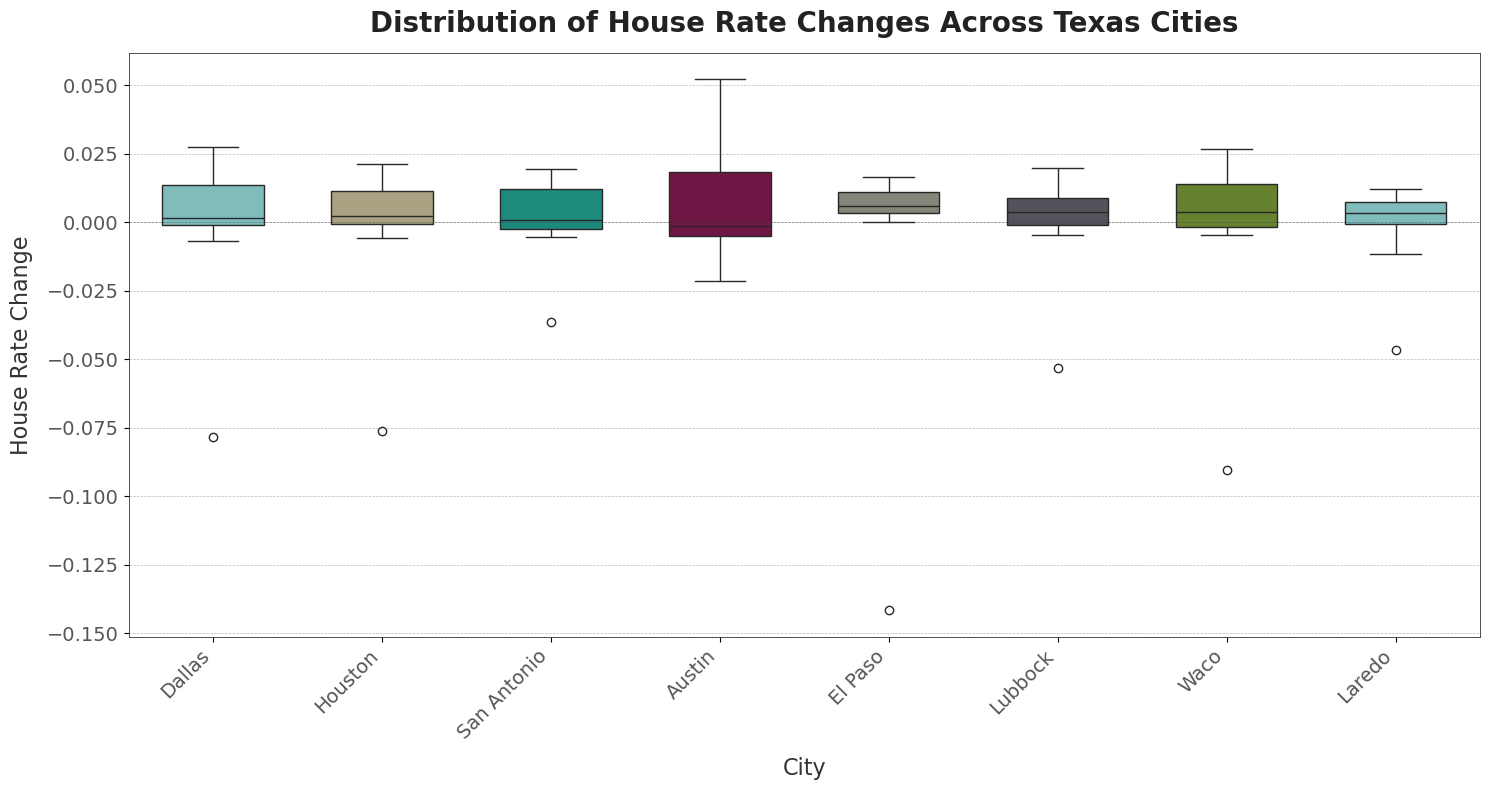

In [10]:
# Melt the data for boxplot visualization

# Step 1: Get all House Rate columns
house_rate_columns = [col for col in df.columns if 'House Rate' in col]

# Step 2: Melt the dataframe into long format
df_melt = df.melt(
    id_vars=["Dates"], 
    value_vars=house_rate_columns,
    var_name="City_HouseRate",
    value_name="HouseRate"
)

# Step 3: Clean up city names
df_melt['City'] = df_melt['City_HouseRate'].str.replace('House Rate ', '')

# Step 4: Set Seaborn style
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')

# Step 5: Create Boxplot
fig, ax = plt.subplots(figsize=(15, 8))

# Custom color palette
colors = ['#76C6C6', '#B0A47C', '#0C9C8C', '#7C0945', '#878777', '#52515E', '#6B8E23']

# Create boxplot
bp = sns.boxplot(
    data=df_melt,
    x='City',
    y='HouseRate',
    palette=colors,
    width=0.6
)

# Customize plot
plt.title('Distribution of House Rate Changes Across Texas Cities', fontsize=20, pad=15, color='#222222', fontweight='semibold')
plt.xlabel('City', fontsize=16, labelpad=10, color='#333333')
plt.ylabel('House Rate Change', fontsize=16, labelpad=10, color='#333333')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')

# Customize grid
plt.grid(True, color='#BBBBBB', linestyle='--', linewidth=0.5, axis='y')
ax.set_axisbelow(True)

# Customize spines
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.6)

# Add a zero line for reference
plt.axhline(0, color='#333333', linestyle='--', linewidth=0.5, alpha=0.5)

# Customize y-axis limits (optional)
# plt.ylim(0.125, 0.85)  # <- Only if you want to manually control

plt.tight_layout()
plt.show()


* Austin stands out with the widest range of house rate changes among all cities. It has the highest positive spikes and some moderate negative drops, indicating high volatility in Austin’s house market compared to others.

* El Paso shows some extreme negative outliers, suggesting that in some periods, house rates dropped significantly there.

* Dallas, Houston, San Antonio, Lubbock, Waco, and Laredo have more compact interquartile ranges (boxes), meaning their house rate changes are more stable and consistent.

Although outliers (dots outside the whiskers) are seen for most cities, Austin, El Paso, and Lubbock show the most extreme outlier behavior.

Median (central line) for most cities is close to zero, suggesting that over time, the average house rate change fluctuates around a stable point — but with occasional spikes.

* While most Texas cities show moderate and stable house rate changes, Austin exhibits the greatest volatility, and El Paso has experienced severe negative dips. These patterns could point to market-specific shocks or local economic conditions affecting these cities differently.

In [13]:
# Calculate summary statistics for House Rate grouped by City
print("\nSummary Statistics by City:")

# Group by City and describe HouseRate
summary_stats = df_melt.groupby('City')['HouseRate'].describe()
print(summary_stats)


Summary Statistics by City:
             count      mean       std       min       25%       50%  \
City                                                                   
Austin        60.0  0.005482  0.016872 -0.021356 -0.004814 -0.001374   
Dallas        60.0  0.004635  0.014336 -0.078135 -0.001010  0.001546   
El Paso       60.0  0.004874  0.019871 -0.141553  0.003456  0.005985   
Houston       60.0  0.003890  0.012732 -0.075941 -0.000502  0.002220   
Laredo        60.0  0.002467  0.008282 -0.046699 -0.000479  0.003304   
Lubbock       60.0  0.003584  0.009927 -0.053239 -0.000818  0.003939   
San Antonio   60.0  0.003851  0.009583 -0.036421 -0.002562  0.000747   
Waco          60.0  0.005179  0.015271 -0.090259 -0.001508  0.003870   

                  75%       max  
City                             
Austin       0.018468  0.052184  
Dallas       0.013574  0.027335  
El Paso      0.011227  0.016510  
Houston      0.011608  0.021178  
Laredo       0.007438  0.012277  
Lubbock     

Using the following columns for the heatmap:
['House Rate Dallas', 'House Rate Houston', 'House Rate San Antonio', 'House Rate Austin', 'House Rate El Paso', 'House Rate Lubbock', 'House Rate Waco', 'House Rate Laredo']


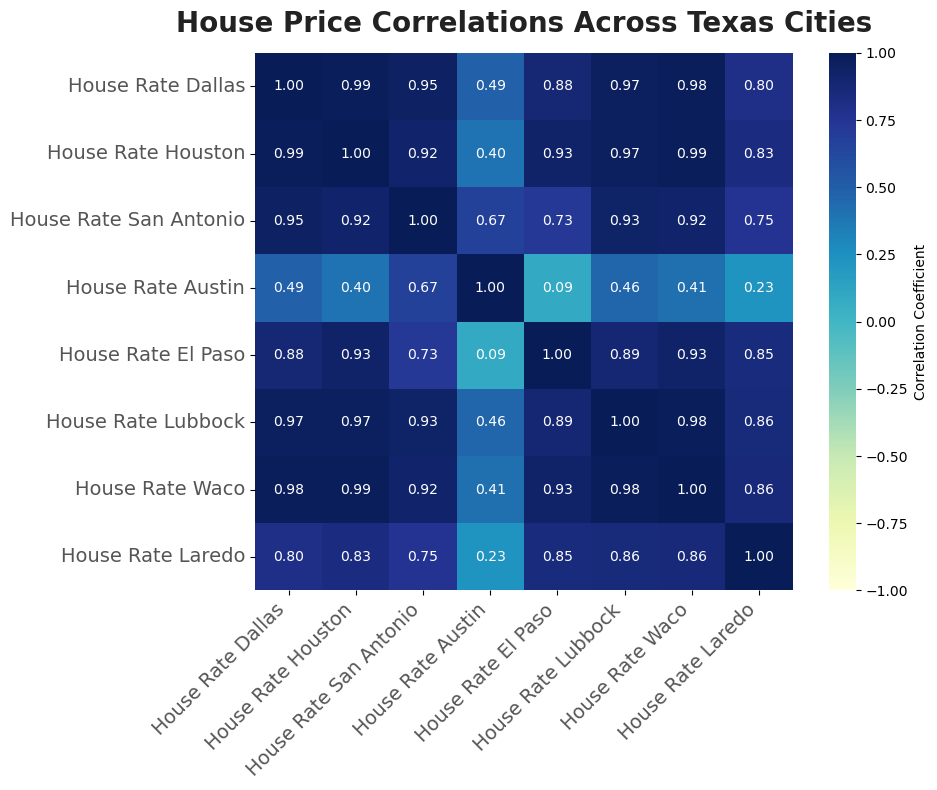

In [16]:
# Clean column names 
df.columns = df.columns.str.strip()

# Automatically select all columns that begin with 'House Rate'
house_rate_cities = [col for col in df.columns if col.startswith('House Rate')]

print("Using the following columns for the heatmap:")
print(house_rate_cities)

if not house_rate_cities:
    print("No house rate columns were found!")
else:
    # Calculate the correlation matrix
    corr_matrix = df[house_rate_cities].corr()

    # Set up the figure with custom styling
    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

    # Create heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='YlGnBu',
        vmin=-1,
        vmax=1,
        square=True,
        cbar_kws={'label': 'Correlation Coefficient'}
    )

    # Style the plot
    plt.title('House Price Correlations Across Texas Cities',
              fontsize=20, pad=15, color='#222222', fontweight='semibold')
    plt.xticks(rotation=45, ha='right', fontsize=14, color='#555555')
    plt.yticks(fontsize=14, color='#555555', rotation=0)

    plt.tight_layout()
    plt.show()


The heatmap displays the correlation coefficients between House Rate values across different cities.
A value closer to 1.00 indicates a strong positive correlation (they move together), while a value closer to 0 means weak or no correlation.

Key Observations:

House Rate Dallas and House Rate Houston have an extremely strong correlation (0.99), meaning their house rates move almost identically.

Similarly, Dallas also shows strong positive correlation with Waco (0.98) and Lubbock (0.97).

Most other cities, such as Houston, Waco, Lubbock, and El Paso, are also highly correlated with each other (values above 0.90).

However, House Rate Austin stands out with weaker correlations:

Only 0.49 with Dallas

0.40 with Houston

0.46 with Lubbock

0.23 with Laredo

This indicates that Austin's house rate trend behaves differently compared to other cities in this dataset.

Summary: Overall, most cities show very high interconnectedness in house rate trends, except for Austin, which appears to move independently.
This suggests market behavior in Austin is different from the rest of the cities analyzed.

In [19]:
# Import libraries 
import numpy as np

# Create Upper Triangle Matrix (ignore self-correlation 1.00)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find Top 3 Strongest House Rate Correlations
print("\nTop 3 Strongest House Rate Correlations:")

top_corr = upper.unstack().sort_values(ascending=False).dropna()[:3]  # Strongest correlations

for idx, value in top_corr.items():
    print(idx[0] + " - " + idx[1] + ": " + str(round(value, 3)))

# Find Top 3 Weakest House Rate Correlations
print("\nTop 3 Weakest House Rate Correlations:")

weak_corr = upper.unstack().sort_values(ascending=True).dropna()[:3]  # Weakest correlations

for idx, value in weak_corr.items():
    print(idx[0] + " - " + idx[1] + ": " + str(round(value, 3)))



Top 3 Strongest House Rate Correlations:
House Rate Houston - House Rate Dallas: 0.992
House Rate Waco - House Rate Houston: 0.987
House Rate Waco - House Rate Lubbock: 0.985

Top 3 Weakest House Rate Correlations:
House Rate El Paso - House Rate Austin: 0.088
House Rate Laredo - House Rate Austin: 0.233
House Rate Austin - House Rate Houston: 0.397


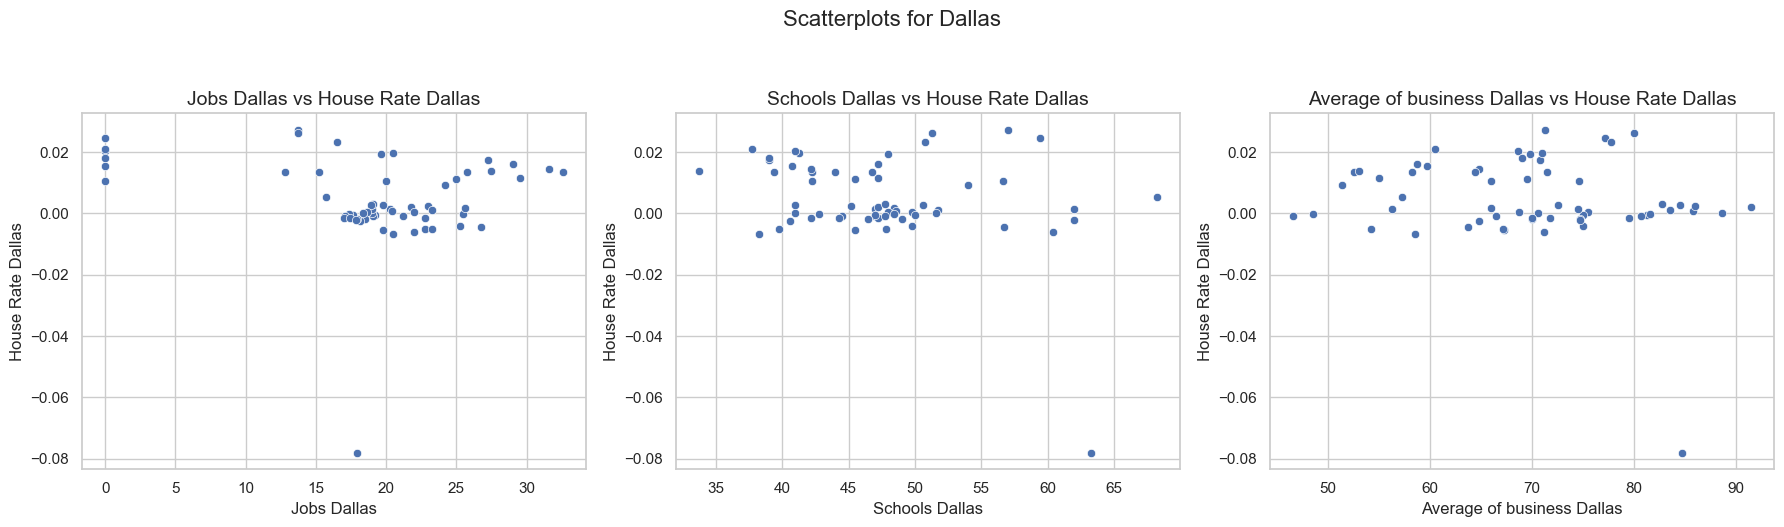

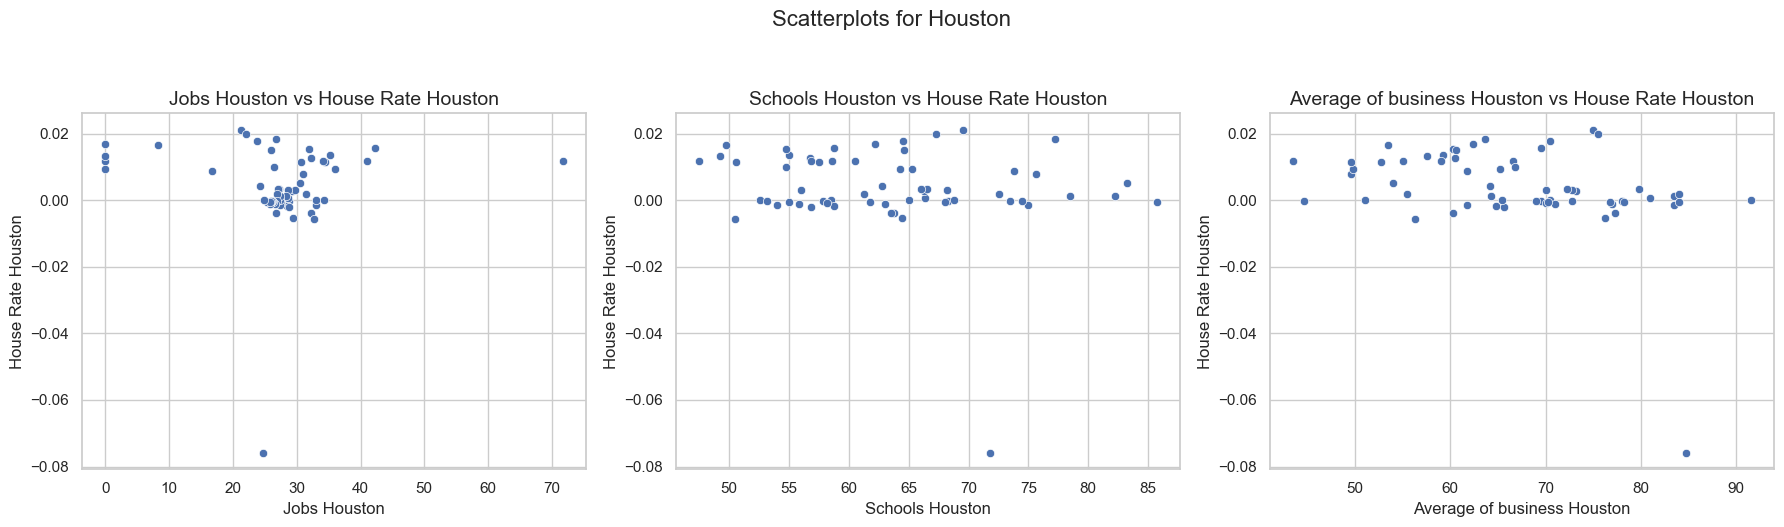

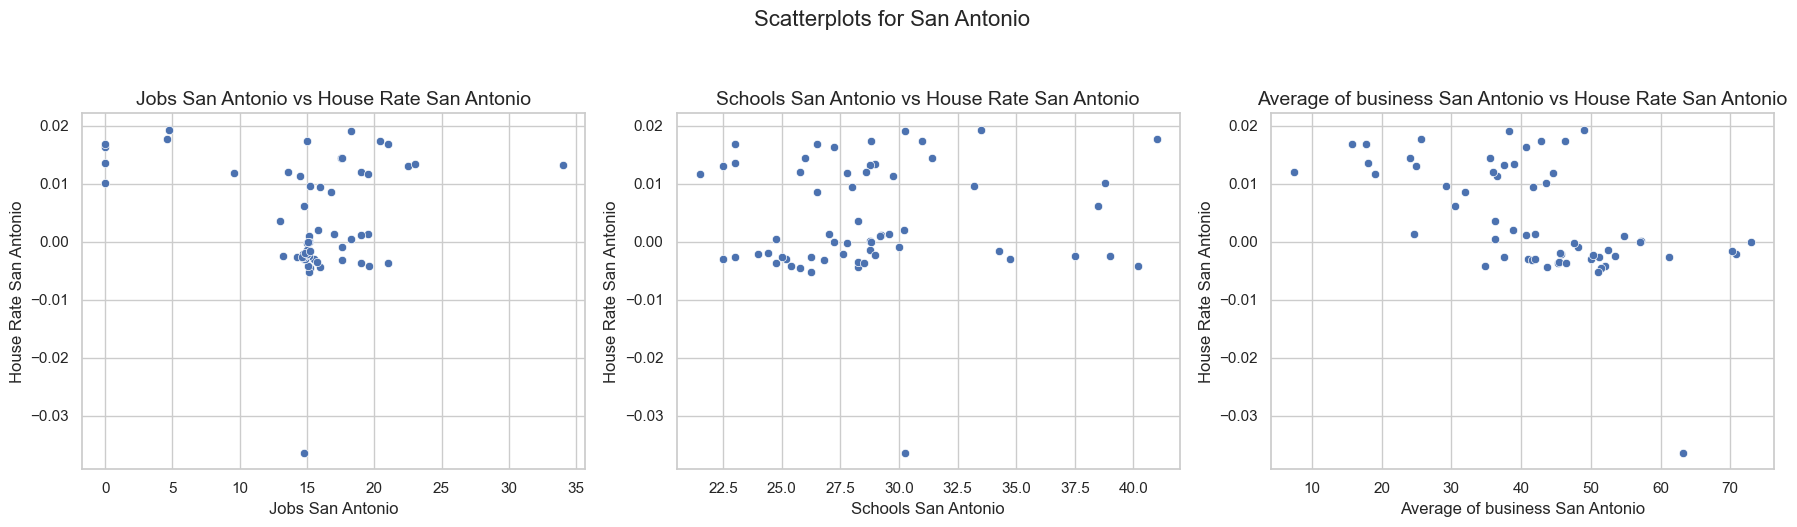

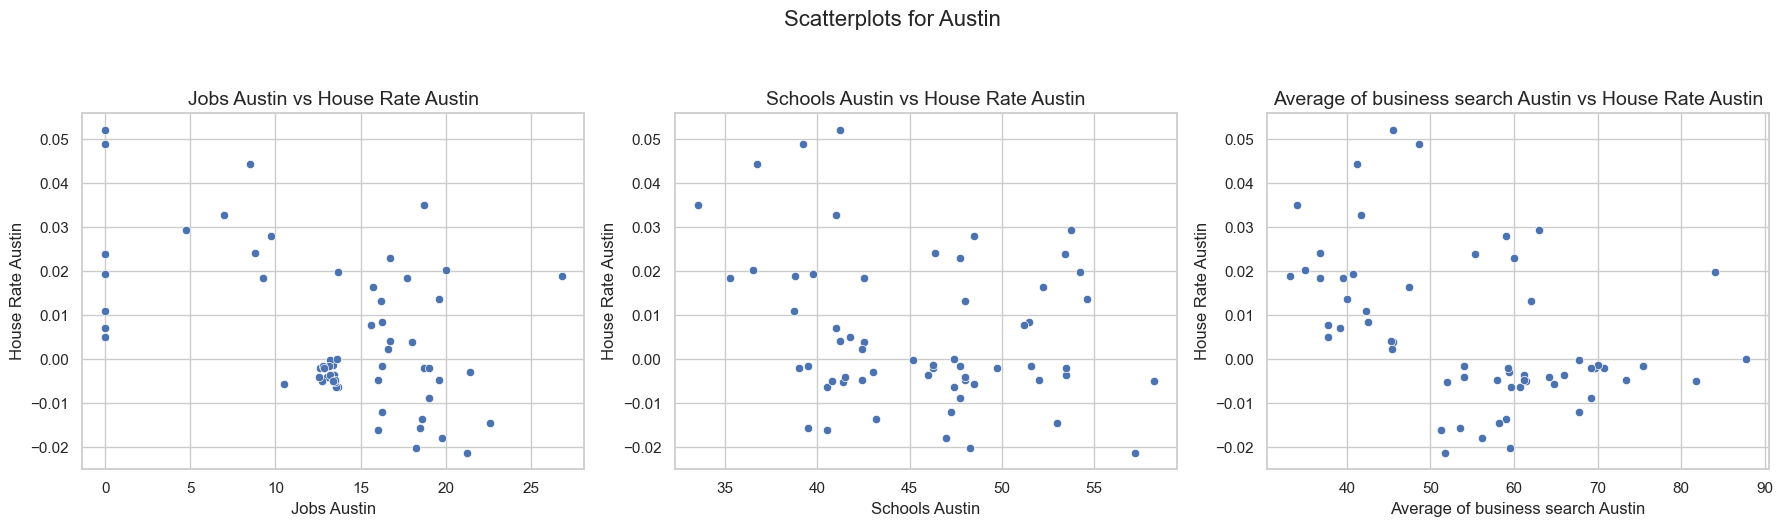

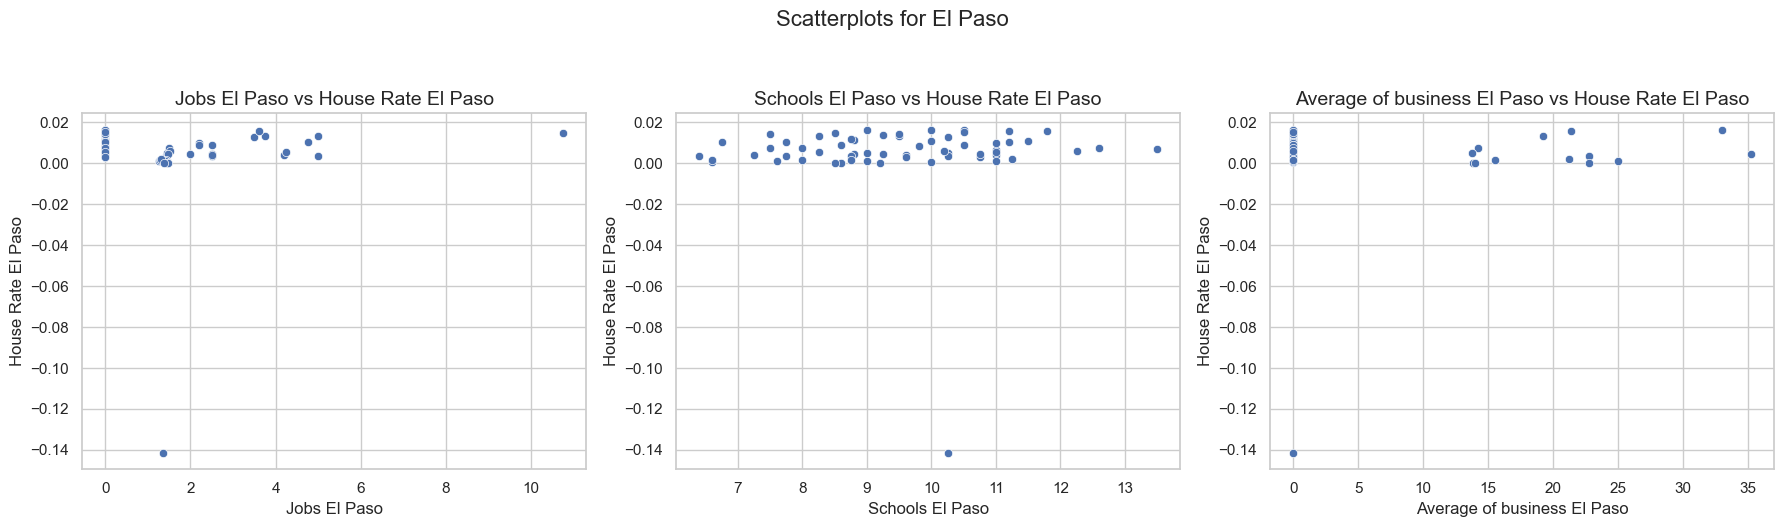

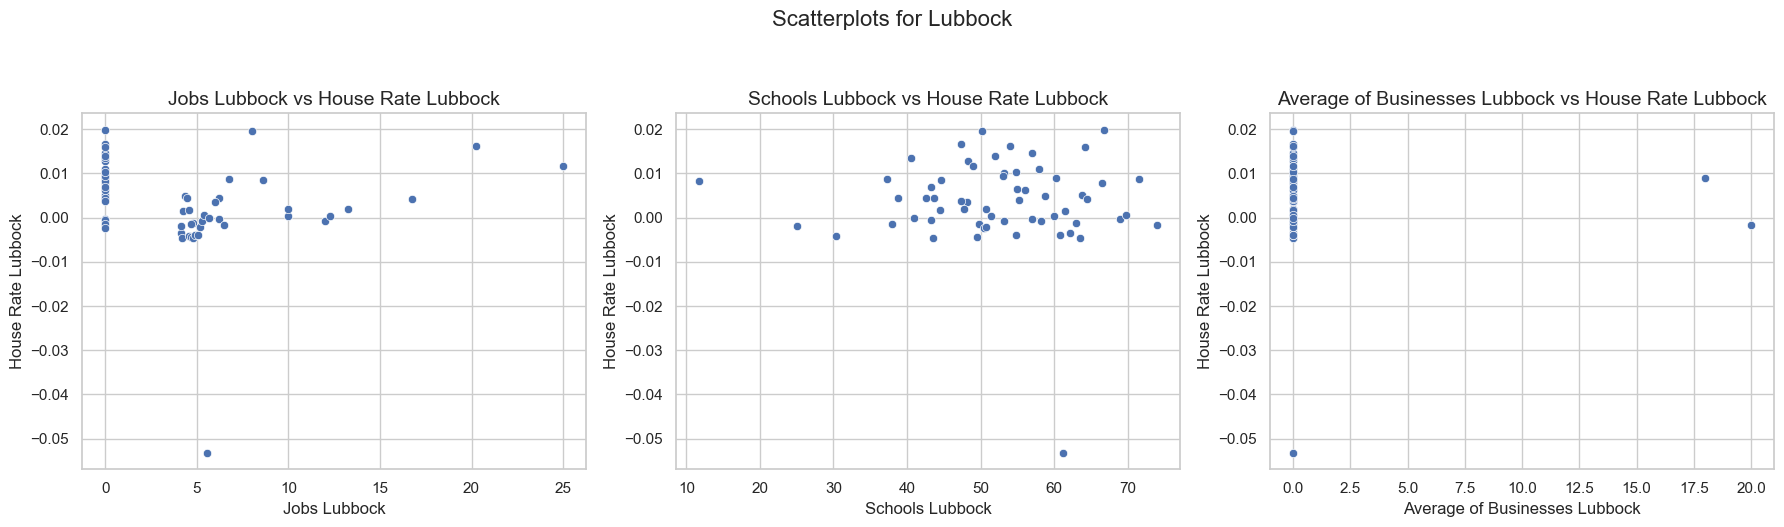

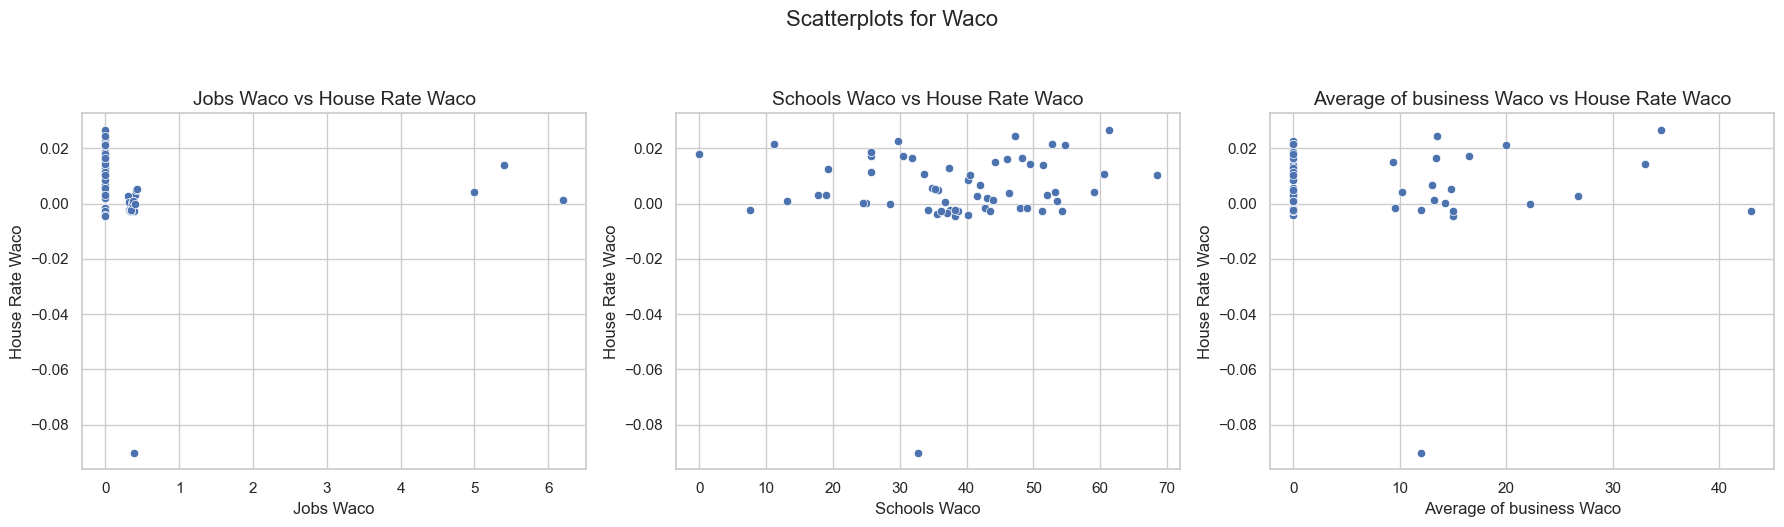

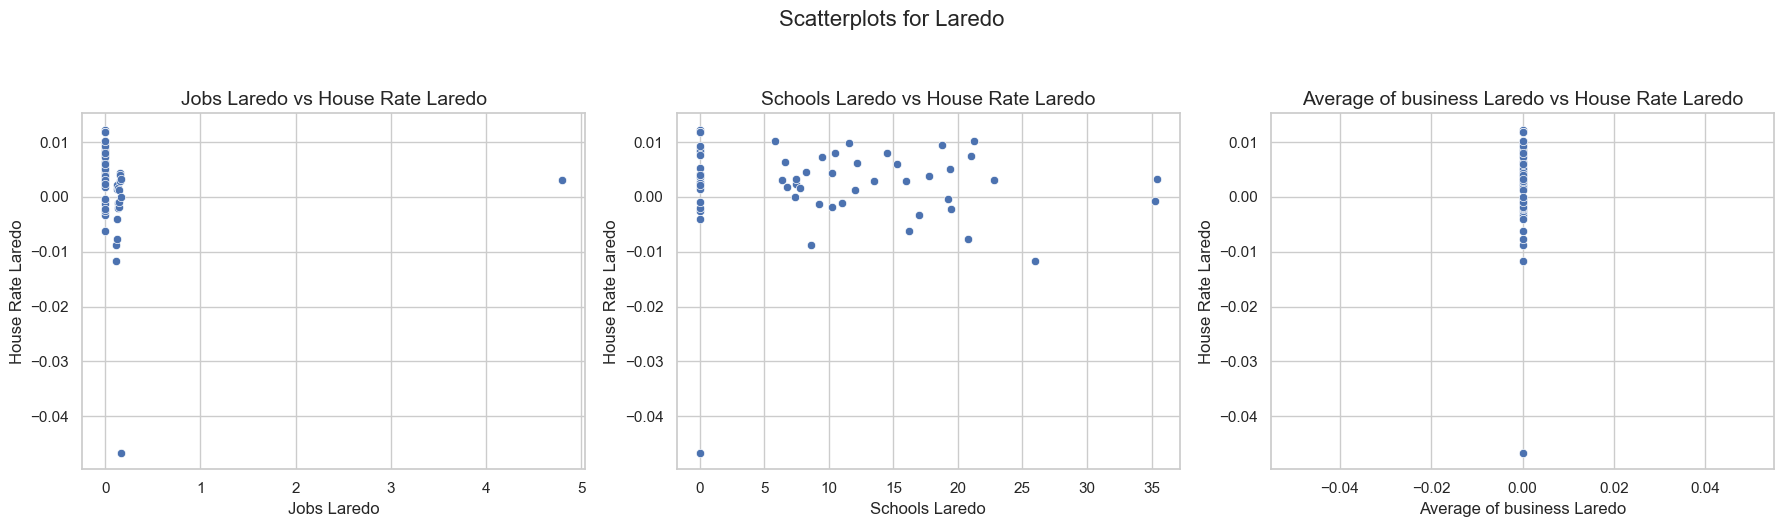

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# List all your cities
cities = ['Dallas', 'Houston', 'San Antonio', 'Austin', 'El Paso', 'Lubbock', 'Waco', 'Laredo']

# Loop through each city and create scatterplots
for city in cities:
    # Define the columns for the current city
    job_col = f'Jobs {city}'
    school_col = f'Schools {city}'
    house_rate_col = f'House Rate {city}'

    # Handle 'business' special names for Lubbock and Austin
    if city == "Lubbock":
        business_col = f'Average of Businesses {city}'
    elif city == "Austin":
        business_col = f'Average of business search {city}'
    else:
        business_col = f'Average of business {city}'
    
    # Create figure with 3 plots (Jobs, Schools, Business vs House Rate)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    independent_vars = [job_col, school_col, business_col]

    for idx, var in enumerate(independent_vars):
        sns.scatterplot(x=df[var], y=df[house_rate_col], ax=axes[idx])
        axes[idx].set_xlabel(var, fontsize=12)
        axes[idx].set_ylabel(house_rate_col, fontsize=12)
        axes[idx].set_title(f'{var} vs {house_rate_col}', fontsize=14)
        axes[idx].grid(True)

    plt.suptitle(f'Scatterplots for {city}', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


In [30]:
import statsmodels.api as sm

# Ensure columns have no extra whitespace
df.columns = df.columns.str.strip()

# Automatically select columns for each group
house_rate_cols = [col for col in df.columns if col.startswith('House Rate')]
schools_cols = [col for col in df.columns if col.startswith('Schools')]
jobs_cols = [col for col in df.columns if col.startswith('Jobs')]
business_cols = [col for col in df.columns if col.startswith('Average of business') or 
                  col.startswith('Average of Businesses') or
                  col.startswith('Average of business search')]

# Create aggregate columns using mean of values across cities
df['Aggregate House Rate'] = df[house_rate_cols].mean(axis=1)
df['Aggregate Schools'] = df[schools_cols].mean(axis=1)
df['Aggregate Jobs'] = df[jobs_cols].mean(axis=1)
df['Aggregate Business'] = df[business_cols].mean(axis=1)

# Define dependent and independent variables
reg_data = df[['Aggregate House Rate', 'Aggregate Schools', 'Aggregate Jobs', 'Aggregate Business']]
Y = reg_data['Aggregate House Rate']
X = reg_data[['Aggregate Schools', 'Aggregate Jobs', 'Aggregate Business']]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

print('Multilinear regression completed successfully.')


                             OLS Regression Results                             
Dep. Variable:     Aggregate House Rate   R-squared:                       0.207
Model:                              OLS   Adj. R-squared:                  0.165
Method:                   Least Squares   F-statistic:                     4.883
Date:                  Sun, 27 Apr 2025   Prob (F-statistic):            0.00437
Time:                          15:15:19   Log-Likelihood:                 188.89
No. Observations:                    60   AIC:                            -369.8
Df Residuals:                        56   BIC:                            -361.4
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

The overall model to predict Aggregate House Rate is statistically significant, with a p-value of 0.004 for the F-statistic. This indicates that, collectively, the predictors (Schools, Jobs, Business) explain a significant portion of the variation in house rates.
The R-squared value is 0.207, meaning about 20.7% of the variation in aggregate house rates is explained by the model. The adjusted R-squared is slightly lower at 16.5%, adjusting for the number of predictors.

Looking at the individual coefficients:

Aggregate Business is statistically significant (p = 0.002) and negatively related to house rates, suggesting that higher business search activity is associated with a slight decline in house rates.

Aggregate Jobs has a negative coefficient too, but its p-value (0.109) shows it is not statistically significant, meaning its impact is not reliably different from zero.

Aggregate Schools has almost no effect (very small coefficient) and is highly insignificant (p = 0.940).

The intercept (constant) is significant (p = 0.002), indicating that even without the predictors, there is a baseline house rate level.

Overall, business search activity emerges as the only strong and statistically significant predictor in this model. Jobs and Schools do not show a meaningful individual impact on the house rate in this regression.

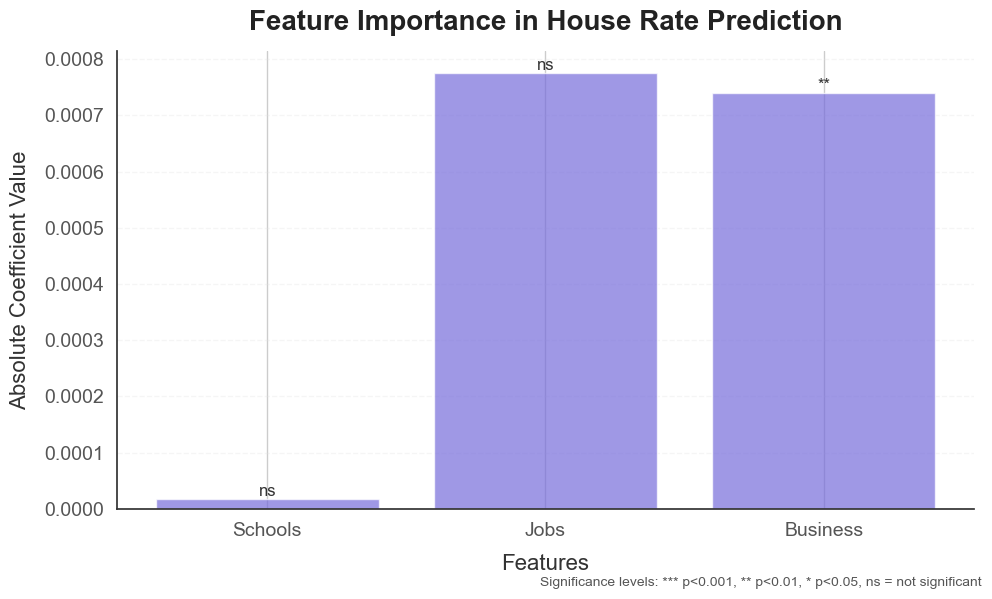

✅ Feature importance visualization completed!


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from your model (fill these after running regression)
features = ['Schools', 'Jobs', 'Business']
importances = np.abs(model.params[1:])  # Take absolute values of coefficients (ignore constant)
p_values = model.pvalues[1:]            # Take p-values (ignore constant)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(features, importances, color='#766CDB', alpha=0.7)

# Customize appearance
plt.title('Feature Importance in House Rate Prediction', fontsize=20, pad=15, color='#222222', fontweight='semibold')
plt.xlabel('Features', fontsize=16, labelpad=10, color='#333333')
plt.ylabel('Absolute Coefficient Value', fontsize=16, labelpad=10, color='#333333')

# Add significance stars based on p-values
for idx, (bar, p_val) in enumerate(zip(bars, p_values)):
    height = bar.get_height()
    stars = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    plt.text(idx, height, stars, ha='center', va='bottom', color='#333333', fontsize=12)

# Customize grid and spines
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='#E0E0E0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#333333')
plt.gca().spines['bottom'].set_color('#333333')

# Customize ticks
plt.xticks(fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')

# Add legend for significance
plt.figtext(0.99, 0.01, 'Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant',
            ha='right', fontsize=10, color='#555555')

plt.tight_layout()
plt.show()

print("✅ Feature importance visualization completed!")


* The feature importance chart shows that "Jobs" and "Business" are the most influential predictors in explaining changes in house rates, based on their higher absolute coefficient values compared to "Schools."
*  "Jobs" has the highest impact but is statistically not significant, meaning its relationship with house rates is not strong enough to be conclusive.
* "Business" also shows a large effect size and is statistically significant, indicating a reliable negative relationship with house rates.
*  In contrast, "Schools" has a very small coefficient value, suggesting that school-related searches had little to no influence on house rate changes in this analysis.
*   Overall, business search emerges as a stronger and more trustworthy factor influencing house rate movements compared to schools and job searches.

In [38]:
df=pd.read_excel("C:/Users/knowl/OneDrive/Desktop/ProjectRegression.xlsx")

In [40]:
df.head(10)

,Dates,House Rate Dallas,House Rate Houston,House Rate San Antonio,House Rate Austin,House Rate El Paso,House Rate Lubbock,House Rate Waco,House Rate Laredo,Schools San Antonio,...,Jobs Waco,Jobs Laredo,Average of business Waco,Average of business Laredo,Average of Businesses Lubbock,Average of business El Paso,Average of business Houston,Average of business San Antonio,Average of business Dallas,Average of business search Austin
0,2020-04-30,-0.000036,-0.000007,0.001338,0.003904,0.004798,0.004050,0.004331,0.004620,27.00,...,0.0,0.0,0.0,0,0,0.0,51.00,42.00,48.50,45.50
1,2020-05-31,-0.000822,-0.000185,0.001351,0.002384,0.004469,0.004444,0.003688,0.006128,29.60,...,0.0,0.0,0.0,0,0,0.0,44.60,24.60,46.60,45.40
2,2020-06-30,0.001373,0.001763,0.003602,0.004029,0.004838,0.006405,0.006680,0.007922,28.25,...,0.0,0.0,13.0,0,0,0.0,55.50,36.25,56.25,45.25
3,2020-07-31,0.005424,0.005133,0.006151,0.008463,0.007229,0.007726,0.010399,0.010287,38.50,...,0.0,0.0,0.0,0,0,0.0,54.00,30.50,57.25,42.50
4,2020-08-31,0.009367,0.007760,0.009597,0.013615,0.010536,0.008612,0.014015,0.009523,33.20,...,5.4,0.0,0.0,0,0,0.0,49.60,29.20,51.40,40.00
5,2020-09-30,0.011578,0.009437,0.011426,0.016317,0.012682,0.008928,0.016161,0.002640,29.75,...,0.0,0.0,0.0,0,18,0.0,49.75,36.50,55.00,47.50
6,2020-10-31,0.013389,0.011380,0.013074,0.018508,0.013468,0.010159,0.017194,0.002979,22.50,...,0.0,0.0,16.5,0,0,0.0,52.75,25.00,58.25,39.50
7,2020-11-30,0.013350,0.011316,0.012123,0.018913,0.011367,0.008569,0.015051,0.004041,25.80,...,0.0,0.0,9.4,0,0,0.0,49.60,7.40,52.60,33.20
8,2020-12-31,0.013932,0.011639,0.011709,0.020341,0.010258,0.008236,0.012606,0.012277,21.50,...,0.0,0.0,0.0,0,0,0.0,43.50,19.00,53.00,35.00
9,2021-01-31,0.014537,0.011603,0.011953,0.024078,0.010747,0.009347,0.012878,0.011816,27.80,...,0.0,0.0,0.0,0,0,0.0,66.60,44.60,64.80,36.80


In [48]:
print(df.shape)

(60, 33)


In [54]:
for col in df.columns:
    if 'Austin' in col:
        print(col)


House Rate Austin
Schools Austin
Jobs Austin
Average of business search Austin


In [60]:
for col in df.columns:
    if 'Lubbock' in col:
        print(col)


House Rate Lubbock
Schools Lubbock
Jobs Lubbock
Average of Businesses Lubbock


In [64]:
for col in df.columns:
    if 'Austin' in col:
        print(col)

House Rate Austin
Schools Austin
Jobs Austin
Business search Austin


In [66]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_excel('ProjectRegression.xlsx')

# Clean column names
df.columns = df.columns.str.strip()

# Special renaming:
df.rename(columns=lambda x: x.replace('Average of business', 'Business')
                             .replace('Average of Businesses', 'Business')
                             .replace('Business search', 'Business'), inplace=True)

# List of cities
city_list = ['Austin', 'Dallas', 'Houston', 'San Antonio', 'El Paso', 'Lubbock', 'Waco', 'Laredo']

# Dictionary to store results
results_dict = {}

# Loop through cities
for city in city_list:
    house_rate_col = [col for col in df.columns if f'House Rate {city}' == col]
    schools_col = [col for col in df.columns if f'Schools {city}' == col]
    jobs_col = [col for col in df.columns if f'Jobs {city}' == col]
    business_col = [col for col in df.columns if f'Business {city}' == col]

    if house_rate_col and schools_col and jobs_col and business_col:
        temp_df = df[house_rate_col + schools_col + jobs_col + business_col].copy()
        temp_df.columns = ['House Rate', 'Schools', 'Jobs', 'Business']
        temp_df = temp_df.dropna()

        Y = temp_df['House Rate']
        X = temp_df[['Schools', 'Jobs', 'Business']]
        X = sm.add_constant(X)

        model = sm.OLS(Y, X).fit()

        results_dict[city] = {
            'R-squared': model.rsquared,
            'Adj R-squared': model.rsquared_adj,
            'Coefficients': model.params,
            'P-values': model.pvalues,
            'Model': model
        }

        print(f"\n{'='*20} {city} Regression Results {'='*20}")
        print(f"R-squared: {model.rsquared:.3f}")
        print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
        print(f"F-statistic p-value: {model.f_pvalue:.3f}")
        print(model.summary().tables[1])
        print("="*60)

    else:
        print(f"⚠️ Warning: Skipping {city} due to missing columns!")

print("\n✅ Regression analysis completed for all cities successfully!")



==================== Austin Regression Results ====================
R-squared: 0.386
Adjusted R-squared: 0.353
F-statistic p-value: 0.000
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0514      0.014      3.637      0.001       0.023       0.080
Schools       -0.0001      0.000     -0.338      0.737      -0.001       0.001
Jobs          -0.0012      0.000     -4.136      0.000      -0.002      -0.001
Business      -0.0004      0.000     -2.885      0.006      -0.001      -0.000

==================== Dallas Regression Results ====================
R-squared: 0.170
Adjusted R-squared: 0.126
F-statistic p-value: 0.014
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0568      0.016      3.491      0.001       0.024       0.089
Schools    

C:\Users\knowl\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


* The regression analysis showed that house rate changes in major cities like Austin, San Antonio, Houston, and Dallas are partially influenced by school searches, job searches, and business searches.
* In Austin and San Antonio, business-related searches had a significant negative impact on house rates, suggesting that increased business activity could be linked to slower growth in house rates.
* In Dallas, both school and job searches negatively impacted house rates in a statistically significant way.
*  In Houston, business searches were also significant, although the overall model was weaker.
*   In contrast, cities like Waco, Laredo, El Paso, and Lubbock exhibited very low R-squared values, indicating that changes in house rates in these locations are likely driven by other factors not captured in this dataset. Overall, the model explained the highest variation in Austin, where nearly 39% of the house rate changes were captured by the selected predictors, highlighting stronger relationships in larger, economically active cities compared to smaller markets.